In [0]:
import numpy as np
import torch
from torch import nn
from torch import optim

import matplotlib.pyplot as plt
import torch.cuda as cuda
import time
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Use a GPU, i.e. cuda:0 device if it available.
device = torch.device("cuda:0" if cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
!mkdir data
# Download the data.
from torchvision import datasets, transforms

transformations = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_set = datasets.CIFAR10(root='data', download=True, transform=transformations)
test_set = datasets.CIFAR10(root='data', download=True, train=False, transform=transformations)

0it [00:00, ?it/s]

170500096it [00:04, 38911927.19it/s]                               


Files already downloaded and verified


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ResNet18_CIFAR10(nn.Module):
    def __init__(self):
        super(ResNet18_CIFAR10, self).__init__()
        self.conv0 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64)
        )
        self.conv1_res = nn.Sequential()
        self.conv1_2 =nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64)
        )
        self.conv1_2_res = nn.Sequential()
        

        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128)
        )
        self.conv2_res = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=1, stride=2, bias=False),
            nn.BatchNorm2d(128)
        )        
        self.conv2_2 =nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128)
        )
        self.conv2_2_res = nn.Sequential()
 
        

        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256)
        )
        self.conv3_res = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=1, stride=2, bias=False),
            nn.BatchNorm2d(256)
        )         

        self.conv3_2 =nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256)
        )
        self.conv3_2_res = nn.Sequential()


        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512)
        )
        self.conv4_res = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=1, stride=2, bias=False),
            nn.BatchNorm2d(512)
        )        
        self.conv4_2 =nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512)
        )
        self.conv4_2_res = nn.Sequential()
        

        self.fc = nn.Linear(512, 10)
        
    def forward(self, x):
        x = self.conv0(x)
        
        out = self.conv1(x)
        out += self.conv1_res(x)
        x = F.relu(out) 
        out = self.conv1_2(x)
        out += self.conv1_2_res(x)
        x = F.relu(out)  
        
        out = self.conv2(x)
        out += self.conv2_res(x)
        x = F.relu(out)
        out = self.conv2_2(x)
        out += self.conv2_2_res(x)
        x = F.relu(out)
        
        out = self.conv3(x)
        out += self.conv3_res(x)
        x = F.relu(out)       
        out = self.conv3_2(x)
        out += self.conv3_2_res(x)
        x = F.relu(out)

        out = self.conv4(x)
        out += self.conv4_res(x)
        x = F.relu(out)       
        out = self.conv4_2(x)
        out += self.conv4_2_res(x)
        x = F.relu(out)        
        
        out = F.avg_pool2d(x, 4)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [0]:
class CIFAR10_Classifier():
    def __init__(self, net):
        self.net = net
        self.opt = optim.SGD(self.net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
        self.loss_func = nn.CrossEntropyLoss()
        
    def train(self, train_loader, validation_loader=None, num_epochs=10, season =10):
        all_training_loss = np.zeros((0,2))
        all_training_acc = np.zeros((0,2))
        all_validation_loss = np.zeros((0,2))
        all_validation_acc = np.zeros((0,2))

        training_step = 0
        training_loss, training_acc = 2.0, 0.0

        start = time.clock()

        for i in range(num_epochs):
            epoch_start = time.clock() 

            self.net.train()
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                
                self.opt.zero_grad()
                preds = self.net(images)
                loss = self.loss_func(preds, labels)
                loss.backward()
                self.opt.step()

                training_loss += loss.item()
                training_acc += (torch.argmax(preds, dim=1)==labels).float().mean()

                if training_step % season == 0:
                    training_loss /= season
                    training_acc /= season

                    all_training_loss = np.concatenate((all_training_loss, [[training_step, training_loss]]))
                    all_training_acc = np.concatenate((all_training_acc, [[training_step, training_acc]]))

                    print('  Epoch %d @ step %d: Train Loss: %3f, Train Accuracy: %3f' % (
                        i, training_step, training_loss, training_acc))
                    training_loss, training_acc = 0.0, 0.0

                training_step+=1
            
            if validation_loader is not None:

                self.net.eval()
                with torch.no_grad():
                    validation_loss, validation_acc = 0.0, 0.0
                    count = 0
                    for images, labels in validation_loader:
                        images, labels = images.to(device), labels.to(device)
                        
                        output = self.net(images)
                        validation_loss+=self.loss_func(output,labels)
                        validation_acc+=(torch.argmax(output, dim=1) == labels).float().mean()
                        
                        count += 1
                    validation_loss/=count
                    validation_acc/=count

                    all_validation_loss = np.concatenate((all_validation_loss, [[training_step, validation_loss]]))
                    all_validation_acc = np.concatenate((all_validation_acc, [[training_step, validation_acc]]))                

                print('Epoch %d Validation Loss: %3f, Validation Accuracy: %3f' % (
                    i, validation_loss, validation_acc))
            
            epoch_time = time.clock() - epoch_start
            print('Epoch time: %.1fs' % (epoch_time))
        
        total_time = time.clock() - start
        print('Total time: %.1fs' % (total_time))

        return {'loss': { 'train': all_training_loss, 'validation': all_validation_loss },
                'accuracy': { 'train': all_training_acc, 'validation': all_validation_acc }}

    def evaluate(self, test_loader):
        self.net.eval()
        with torch.no_grad():
            test_loss, test_acc = 0.0, 0.0
            count = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)

                output = self.net(images)
                test_loss+=self.loss_func(output,labels)
                test_acc+=(torch.argmax(output, dim=1) == labels).float().mean()
                count += 1
            
            test_loss/=count
            test_acc/=count                

        return {'loss': test_loss, 'accuracy': test_acc}        

In [0]:
resnet = ResNet18_CIFAR10().to(device)


batch_size = 128
train_loader = torch.utils.data.DataLoader(train_set, batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size, shuffle=True, num_workers=2)

clf = CIFAR10_Classifier(net=resnet)
metrics = clf.train(train_loader,test_loader, num_epochs=20)

  Epoch 0 @ step 0: Train Loss: 0.438448, Train Accuracy: 0.009375
  Epoch 0 @ step 10: Train Loss: 2.357458, Train Accuracy: 0.147656
  Epoch 0 @ step 20: Train Loss: 2.182944, Train Accuracy: 0.199219
  Epoch 0 @ step 30: Train Loss: 1.958895, Train Accuracy: 0.262500
  Epoch 0 @ step 40: Train Loss: 1.867948, Train Accuracy: 0.283594
  Epoch 0 @ step 50: Train Loss: 1.788081, Train Accuracy: 0.318750
  Epoch 0 @ step 60: Train Loss: 1.792287, Train Accuracy: 0.339063
  Epoch 0 @ step 70: Train Loss: 1.761823, Train Accuracy: 0.351562
  Epoch 0 @ step 80: Train Loss: 1.730169, Train Accuracy: 0.350000
  Epoch 0 @ step 90: Train Loss: 1.650038, Train Accuracy: 0.366406
  Epoch 0 @ step 100: Train Loss: 1.616392, Train Accuracy: 0.391406
  Epoch 0 @ step 110: Train Loss: 1.655412, Train Accuracy: 0.393750
  Epoch 0 @ step 120: Train Loss: 1.603444, Train Accuracy: 0.398438
  Epoch 0 @ step 130: Train Loss: 1.577065, Train Accuracy: 0.410938
  Epoch 0 @ step 140: Train Loss: 1.637881, T

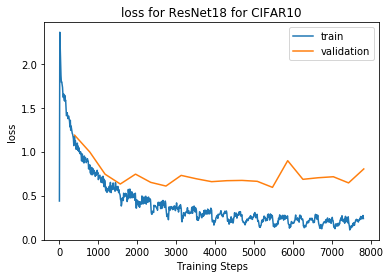

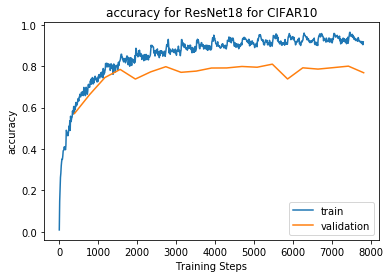

In [0]:
def plot_graphs(model_name, metrics):
  for metric, values in metrics.items():
    for name, v in values.items():
      plt.plot(v[:,0], v[:,1], label=name)
    plt.title(f'{metric} for {model_name}')
    plt.legend()
    plt.xlabel("Training Steps")
    plt.ylabel(metric)
    plt.show()

plot_graphs("ResNet18 for CIFAR10", metrics)    